In [217]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.phonon import plotter
#from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon import bandstructure
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from math import pi, fabs
with MPRester("8dT4ZwJiqOtEkr83gIsD") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-867339") 
    phonons   = m.get_phonon_bandstructure_by_material_id("mp-867339") 

## Structure de bande de phonons :

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.9/site-packages/matplotlib/pyplot.py'>

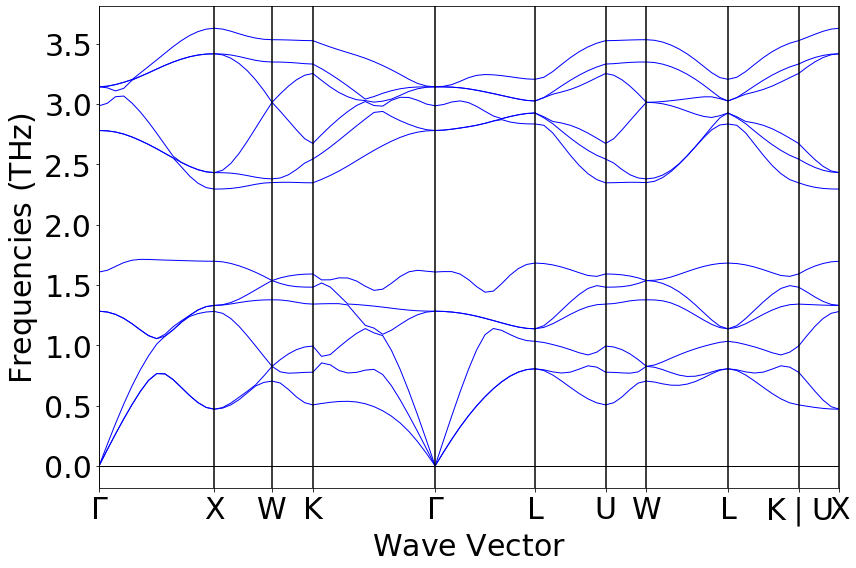

In [218]:
phplot = plotter.PhononBSPlotter(phonons)
phplot.get_plot()

## Zone de Brillouin :

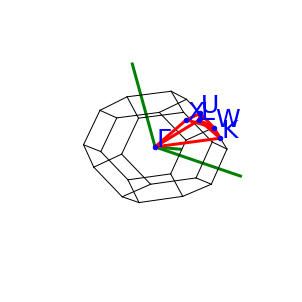

In [219]:
phplot.plot_brillouin() 

## Vitesse du son pour trois branches acoustiques différentes dans trois directions différentes:

Avec de faibles valeurs de $q$ (c’est-à-dire aux grandes longueurs d'onde), la relation de dispersion est presque linéaire:
$$\omega = v_s |\textbf{q}|$$ 


Lorsque $\omega = 0$, $$v_s = \frac{\partial \omega}{\partial \textbf{q}}$$
La vitesse de propagation d'un phonon dans le réseau, qui correspond notamment à la vitesse de propagation du son dans un solide, est donnée par la pente de la relation de dispersion. 

De plus, sachant que $\omega = 2\pi f$, il y a donc un facteur $2\pi $ qui est multiplié à la fréquence pour obtenir la vitesse angulaire.

In [223]:
data = phplot.bs_plot_data()
distances   = data.get("distances")
frequencies = data.get("frequency")
directions  = data.get('ticks').get('label')

zone     = []
branche  = []
freq     = []
def branches(freq_vect ):
    counter  = 0
    for i in range(len(freq_vect)):
        for j in range(len(freq_vect[i])):
            if freq_vect[i][j][0] == 0 and j not in branche and i not in zone:
                zone.append(i)
                branche.append(j)
                freq.append(frequencies[i][j])
                counter += 1 
            elif freq_vect[i][j][-1] == 0 and j not in branche and i not in zone:
                zone.append(i)
                branche.append(j)
                freq.append(frequencies[i][j])
                counter += 1
        if counter == 3:
            print("Branches :", branche)
            print("Zones : ", zone)
            print("Frequences : ", freq)
            return True
        
branches(frequencies)

Branches : [0, 1, 2]
Zones :  [0, 3, 4]
Frequences :  [[0.0, 0.13423651528896918, 0.2648387572218039, 0.38964083744149997, 0.5076027384011816, 0.616442193976844, 0.7086178562599972, 0.765023379204016, 0.7626597433753514, 0.714560528489538, 0.6491299505235293, 0.5826154821283264, 0.5247811921143057, 0.4843187855971656, 0.46955164853384174], [0.7766228766818338, 0.8536569221401945, 0.8375541601186948, 0.7902523261135427, 0.7701173786987066, 0.7749530518724025, 0.7936765062146656, 0.8001795394098898, 0.7570454500719235, 0.6640714057273038, 0.5465932166296753, 0.4178790468929028, 0.282566886037048, 0.14261392707787673, 0.0], [0.0, 0.20927944822867522, 0.4150173114721154, 0.6133937599000417, 0.7992562735711843, 0.9637653841351754, 1.0880765252138993, 1.1391146268851473, 1.1234648616941763, 1.0887468409377312, 1.0582382880612977, 1.0388933931345545, 1.0323874662590522]]


True

In [221]:
# 3 distances
q1 = distances[zone[0]]
q2 = distances[zone[1]]
q3 = distances[zone[2]]

# fréquences de ces distances
freq1 = freq[0]
freq2 = freq[1]
freq3 = freq[2]
    
# Pente pour la premiere branche
x1 = np.array([q1[0],q1[1]])
y1 = np.array([freq1[0],freq1[1]])
coef1 = np.polyfit(x1,y1,1)
a1 = np.linspace(q1[0],q1[-1],1000)
d1 =coef1[0]*a1+coef1[1]

# Pente pour la deuxieme branche
x2 = np.array([q2[-1],q2[-2]])
y2 = np.array([freq2[-1],freq2[-2]])
coef2 = np.polyfit(x2,y2,1)
a2 = np.linspace(q2[0],q2[-1],1000)
d2 =coef2[0]*a2+coef2[1]

# Pente pour la troisieme branche
x3 = np.array([q3[0],q3[1]])
y3 = np.array([freq3[0],freq3[1]])
coef3 = np.polyfit(x3,y3,1)
a3 = np.linspace(q3[0],q3[-1],1000)
d3 =coef3[0]*a3+coef3[1]

#facteur correctif (Angstrom en m et THz en Hz)
fact = 100
print("La vitesse du son de la branche acoustique", branche[0]+1, "selon la direction \u0393 - X est de ", 2*pi*fabs(coef1[0])*fact, " [m/s].")
print("La vitesse du son de la branche acoustique", branche[1]+1, "selon la direction K - \u0393 est de ", 2*pi*fabs(coef2[0])*fact, "[m/s].")
print("La vitesse du son de la branche acoustique", branche[2]+1, "selon la direction \u0393 - L est de ", 2*pi*fabs(coef3[0])*fact, "[m/s].")

La vitesse du son de la branche acoustique 1 selon la direction Γ - X est de  1634.416422967436  [m/s].
La vitesse du son de la branche acoustique 2 selon la direction K - Γ est de  1637.1094887657425 [m/s].
La vitesse du son de la branche acoustique 3 selon la direction Γ - L est de  2521.9775033578258 [m/s].


La vitesse du son de la branche acoustique 1 selon la direction Γ - X est de  1634.416422967436  [m/s].<br/>
La vitesse du son de la branche acoustique 2 selon la direction K - Γ est de  1637.1094887657425 [m/s].<br/>
La vitesse du son de la branche acoustique 3 selon la direction Γ - L est de  2521.9775033578258 [m/s].


On peut remarquer une différence de vitesse en fonction de la branche accoustique. Il s'agit donc d'un matériau anisotrope. 

## Représentation des tangentes :

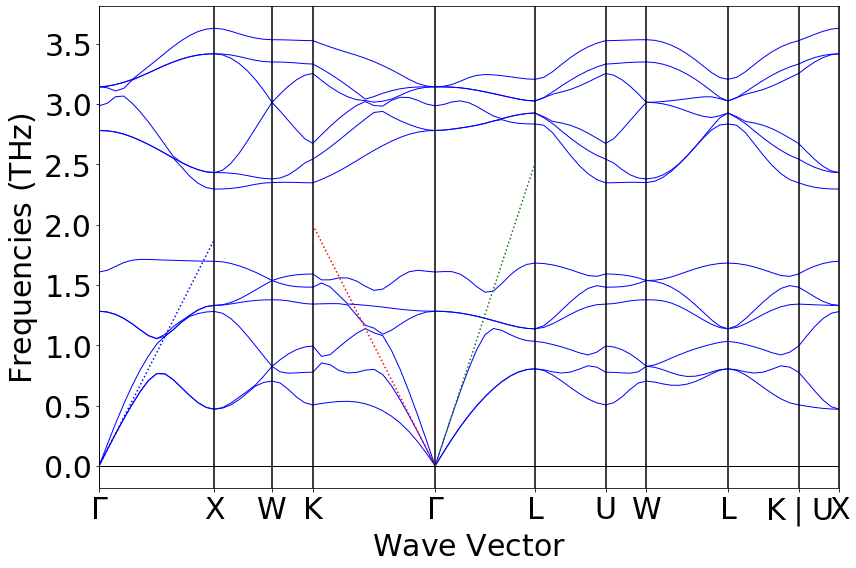

In [224]:
# Graphique
phplot.get_plot()
plt.plot(a1,d1,color='b',ls=':')
plt.plot(a2,d2,color='r',ls=':')
plt.plot(a3,d3,color='g',ls=':')
plt.show()